In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
game_reviews = pd.read_csv("all_Steam_Reviews_cleaned.csv")
pos_reviews=pd.read_csv("positive_steam_reviews.csv")
neg_reviews=pd.read_csv("negative_steam_reviews.csv")

In [39]:
pos_reviews

,Game,Review,Recommended,Genre,cleaned_review
0,Company of Heroes 3,Here is my actual review. COH3 has the best Qo...,True,"Action, Strategy",actual review COH good qol franchise stop play...
1,Company of Heroes 3,I resisted for quite a while to buy this game ...,True,"Action, Strategy",resist buy game not expect game different CoH ...
2,Company of Heroes 3,Final Thoughts\nCompany of Heroes 3 is a stunn...,True,"Action, Strategy",final Thoughts Company Heroes stunning evoluti...
3,Company of Heroes 3,game has come a long way since release but can...,True,"Action, Strategy",game come long way release feel like cash grab...
4,Company of Heroes 3,A great RTS that is going to get better with e...,True,"Action, Strategy",great RTS go well major update time start play...
...,...,...,...,...,...
34040,Baldur's Gate 3,It's not just a game! It's a whole story that ...,True,"Adventure, RPG, Strategy",game story completely immerse primarily thank ...
34041,Baldur's Gate 3,It's the closest you're going to get to playin...,True,"Adventure, RPG, Strategy",close go play DnD group friend willing sit pla...
34042,Baldur's Gate 3,verry gooood gammeeee. I slept on it for to lo...,True,"Adventure, RPG, Strategy",verry gooood gammeeee sleep long finish ton co...
34043,Baldur's Gate 3,Funny wild magic sorceror Durge run made every...,True,"Adventure, RPG, Strategy",funny wild magic sorceror Durge run turn cat t...


In [4]:
# Define TF-IDF vectorizers
vectorizer_pos = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=5000)  # Unigrams & bigrams
vectorizer_neg = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=5000)  # Unigrams & bigrams

# Remove NaN values from the cleaned_review columns
pos_reviews_cleaned = pos_reviews["cleaned_review"].dropna()
neg_reviews_cleaned = neg_reviews["cleaned_review"].dropna()

# Fit and transform the positive reviews
tfidf_matrix_pos = vectorizer_pos.fit_transform(pos_reviews_cleaned)

# Fit and transform the negative reviews
tfidf_matrix_neg = vectorizer_neg.fit_transform(neg_reviews_cleaned)

# Get feature names
terms_pos = vectorizer_pos.get_feature_names_out()
terms_neg = vectorizer_neg.get_feature_names_out()

# Compute the mean TF-IDF scores per term
tfidf_sum_pos = tfidf_matrix_pos.mean(axis=0).A1
tfidf_sum_neg = tfidf_matrix_neg.mean(axis=0).A1

# Create DataFrames with terms and scores
tfidf_df_pos = pd.DataFrame({'term': terms_pos, 'tfidf_score': tfidf_sum_pos})
tfidf_df_neg = pd.DataFrame({'term': terms_neg, 'tfidf_score': tfidf_sum_neg})

# Sort by importance (highest TF-IDF scores)
tfidf_df_pos = tfidf_df_pos.sort_values(by="tfidf_score", ascending=False)
tfidf_df_neg = tfidf_df_neg.sort_values(by="tfidf_score", ascending=False)


In [6]:
# Define function to get top words per game
def get_top_words_per_game(reviews_df, vectorizer, top_n=10):
    top_words_per_game = {}

    for game in reviews_df["Game"].unique():
        # Filter reviews for the specific game
        game_reviews = reviews_df[reviews_df["Game"] == game]["cleaned_review"]

        if game_reviews.empty:
            continue  # Skip if no reviews

        # Apply TF-IDF for the specific game
        tfidf_matrix = vectorizer.fit_transform(game_reviews)
        terms = vectorizer.get_feature_names_out()

        # Compute mean TF-IDF scores for words
        row = tfidf_matrix.mean(axis=0).A1
        sorted_terms = [terms[idx] for idx in row.argsort()[::-1][:top_n]]

        # Store in dictionary
        top_words_per_game[game] = sorted_terms

    return top_words_per_game





In [7]:
# Remove NaN values from the cleaned_review columns
pos_reviews_cleaned = pos_reviews.dropna(subset=['cleaned_review'])
neg_reviews_cleaned = neg_reviews.dropna(subset=['cleaned_review'])

# Compute top words per game for positive & negative reviews
top_words_pos = get_top_words_per_game(pos_reviews_cleaned, vectorizer_pos)
top_words_neg = get_top_words_per_game(neg_reviews_cleaned, vectorizer_neg)

In [8]:
# Ensure both dictionaries have the same keys
games = set(top_words_pos.keys()).union(set(top_words_neg.keys()))

# Create lists for DataFrame
games_list = []
top_pos_words_list = []
top_neg_words_list = []

for game in games:
    games_list.append(game)
    top_pos_words_list.append(top_words_pos.get(game, []))
    top_neg_words_list.append(top_words_neg.get(game, []))

# Convert to DataFrame
df_top_words = pd.DataFrame({
    "Game": games_list,
    "Top_Positive_Words": top_pos_words_list,
    "Top_Negative_Words": top_neg_words_list
})

# Save to CSV
df_top_words.to_csv("game_top_tfidf_words.csv", index=False)


In [9]:
df_top_words

,Game,Top_Positive_Words,Top_Negative_Words
0,Mass Effect™ Legendary Edition,"[game, good, play, mass, time, story, great, e...","[game, ea, play, app, launcher, time, hate, ea..."
1,No Man's Sky,"[game, play, good, space, like, great, fun, lo...","[game, bug, like, feel, time, thing, new, base..."
2,The Witcher 3: Wild Hunt,"[game, play, good, story, great, world, witche...","[game, play, like, good, combat, feel, try, fe..."
3,Europa Universalis IV,"[game, fun, good, play, bad, strategy, strateg...","[game, pay, money, money migraine, pay money, ..."
4,0 Day,"[wait devs, wait, love game, love, game wait, ...",[]
...,...,...,...
92,Darkest Dungeon® II,"[game, good, dd, fun, like, great, dungeon, pl...","[game, bad, like, run, boss, time, play, dd, c..."
93,Space Engineers,"[good, game, good game, fun, great, space, pla...","[game, fun, play, wasd, nice, like, dlc, bad, ..."
94,Split Fiction,"[game, play, fun, good, story, amazing, coop, ...","[game, story, world, play, character, worth, f..."
95,Valheim,"[game, play, good, fun, great, like, survival,...","[game, time, play, biome, like, boss, new, hou..."


As we can see the words have some like "game", "good", "play", "great", "bad" that doesnt really say nothing to us, therefore we have to add them to a stopword list to remove them.

In [ ]:
# Custom stopwords to remove
custom_stopwords = {"ve", "re", "want", "try", "new", "work", "need", "thing", "buy", "fix", 
    "hour", "long", "gameplay", "update", "dlc", "player", "pay",
    'time', 'game', 'play', 'good', 'great', 'bad', 'like', 'fun', 
    'best', 'better', 'enjoy', 'recommend', 'yes', "feel", "lot", "come", "way", "nice", "ha", "think",
    "aight", "haha", "gobagool", "goate", "unsuur", "jyjtyjtukutk"
}


def remove_custom_stopwords(text):
    # Tokenize the text using whitespace and remove custom stopwords (ignoring case)
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stopwords]
    return ' '.join(filtered_tokens)

# Remove NaN values and then apply the custom stopwords removal for positive reviews
pos_reviews_cleaned = pos_reviews.dropna(subset=['cleaned_review'])
pos_reviews_cleaned["cleaned_review"] = pos_reviews_cleaned["cleaned_review"].apply(remove_custom_stopwords)

# Remove NaN values and apply custom stopwords removal for negative reviews
neg_reviews_cleaned = neg_reviews.dropna(subset=['cleaned_review'])
neg_reviews_cleaned["cleaned_review"] = neg_reviews_cleaned["cleaned_review"].apply(remove_custom_stopwords)

# Define TF-IDF vectorizers
vectorizer_pos = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=5000)  # Unigrams & bigrams for positive reviews
vectorizer_neg = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=5000)  # Unigrams & bigrams for negative reviews

# Fit and transform the positive reviews
tfidf_matrix_pos = vectorizer_pos.fit_transform(pos_reviews_cleaned["cleaned_review"])

# Fit and transform the negative reviews
tfidf_matrix_neg = vectorizer_neg.fit_transform(neg_reviews_cleaned["cleaned_review"])

# Get feature names
terms_pos = vectorizer_pos.get_feature_names_out()
terms_neg = vectorizer_neg.get_feature_names_out()

# Compute the mean TF-IDF scores per term
tfidf_sum_pos = tfidf_matrix_pos.mean(axis=0).A1 #avoid being biased towards longer documents (that's why we don't use the sum as in class)
tfidf_sum_neg = tfidf_matrix_neg.mean(axis=0).A1

# Create DataFrames with terms and scores
tfidf_df_pos = pd.DataFrame({'term': terms_pos, 'tfidf_score': tfidf_sum_pos})
tfidf_df_neg = pd.DataFrame({'term': terms_neg, 'tfidf_score': tfidf_sum_neg})

# Sort by importance (highest TF-IDF scores)
tfidf_df_pos = tfidf_df_pos.sort_values(by="tfidf_score", ascending=False)
tfidf_df_neg = tfidf_df_neg.sort_values(by="tfidf_score", ascending=False)

# Define function to get top words per game
def get_top_words_per_game(reviews_df, vectorizer, top_n=10):
    top_words_per_game = {}
    for game in reviews_df["Game"].unique():
        # Filter reviews for the specific game
        game_reviews = reviews_df[reviews_df["Game"] == game]["cleaned_review"]
        if game_reviews.empty:
            continue  # Skip if no reviews
        # Apply TF-IDF for the specific game
        tfidf_matrix = vectorizer.fit_transform(game_reviews)
        terms = vectorizer.get_feature_names_out()
        # Compute mean TF-IDF scores for words
        row = tfidf_matrix.mean(axis=0).A1
        sorted_terms = [terms[idx] for idx in row.argsort()[::-1][:top_n]]
        # Store in dictionary
        top_words_per_game[game] = sorted_terms
    return top_words_per_game

# Compute top words per game for positive & negative reviews
top_words_pos = get_top_words_per_game(pos_reviews_cleaned, vectorizer_pos)
top_words_neg = get_top_words_per_game(neg_reviews_cleaned, vectorizer_neg)

# Ensure both dictionaries have the same keys
games = set(top_words_pos.keys()).union(set(top_words_neg.keys()))

# Create lists for DataFrame
games_list = []
top_pos_words_list = []
top_neg_words_list = []

for game in games:
    games_list.append(game)
    top_pos_words_list.append(top_words_pos.get(game, []))
    top_neg_words_list.append(top_words_neg.get(game, []))

# Convert to DataFrame
df_top_words = pd.DataFrame({
    "Game": games_list,
    "Top_Positive_Words": top_pos_words_list,
    "Top_Negative_Words": top_neg_words_list
})

# Save to CSV
df_top_words.to_csv("game_top_tfidf_words.csv", index=False)


/tmp/ipykernel_249278/2884683812.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_reviews_cleaned["cleaned_review"] = pos_reviews_cleaned["cleaned_review"].apply(remove_custom_stopwords)
/tmp/ipykernel_249278/2884683812.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews_cleaned["cleaned_review"] = neg_reviews_cleaned["cleaned_review"].apply(remove_custom_stopwords)


In [32]:
df_top_words

,Game,Top_Positive_Words,Top_Negative_Words
0,Mass Effect™ Legendary Edition,"[story, mass, effect, mass effect, trilogy, series, favorite, amazing, rpg, character]","[ea, hate, app, launcher, ea app, ea launcher, steam, force, bug, mass effect]"
1,No Man's Sky,"[space, exploration, explore, year, planet, amazing, content, hello, free, experience]","[bug, base, planet, progress, launch, space, world, fps, setting, expedition]"
2,The Witcher 3: Wild Hunt,"[story, witcher, world, quest, amazing, combat, rpg, graphic, character, year]","[combat, control, annoying, movement, witcher, experience, npc, kill, world, super]"
3,Europa Universalis IV,"[strategy, hate, tutorial, gud, alright, cinema, dd, learn, little, watch]","[migraine, money migraine, money, card, strategy, spend, ai, scumbag, pound, spend pound]"
4,0 Day,"[wait devs, wait, devs]",[]
...,...,...,...
92,Darkest Dungeon® II,"[dd, dungeon, kingdom, different, darkest, mode, amazing, darkest dungeon, run, character]","[run, boss, dd, character, dungeon, darkest, darkest dungeon, simply, end, hero]"
93,Space Engineers,"[space, build, cool, ship, spend, learn, physics, engineer, sandbox, minecraft]","[design, wasd, tutorial, dlcs, build, forget, clunky unpolished, mid forget, mid, clunky]"
94,Split Fiction,"[story, amazing, coop, experience, friend, level, hazelight, fiction, split, split fiction]","[story, world, character, worth, datum, help, challenging, ea, issue, user]"
95,Valheim,"[survival, friend, world, building, build, valheim, explore, boss, graphic, craft]","[biome, boss, world, save, year, grind, mechanic, developer, enemy, suck]"


In [33]:
for index, row in df_top_words.iterrows():
    print(f"{row['Game']} - Positive Words: {row['Top_Positive_Words']}")

Mass Effect™ Legendary Edition - Positive Words: ['story', 'mass', 'effect', 'mass effect', 'trilogy', 'series', 'favorite', 'amazing', 'rpg', 'character']
No Man's Sky - Positive Words: ['space', 'exploration', 'explore', 'year', 'planet', 'amazing', 'content', 'hello', 'free', 'experience']
The Witcher 3: Wild Hunt - Positive Words: ['story', 'witcher', 'world', 'quest', 'amazing', 'combat', 'rpg', 'graphic', 'character', 'year']
Europa Universalis IV - Positive Words: ['strategy', 'hate', 'tutorial', 'gud', 'alright', 'cinema', 'dd', 'learn', 'little', 'watch']
0 Day - Positive Words: ['wait devs', 'wait', 'devs']
Assassin's Creed® Origins - Positive Words: ['ac', 'story', 'creed', 'graphic', 'egypt', 'assassins', 'ancient', 'assassins creed', 'amazing', 'ancient egypt']
FINAL FANTASY X/X-2 HD Remaster - Positive Words: ['fantasy', 'final', 'final fantasy', 'story', 'franchise', 'ffx', 'classic', 'ps', 'year', 'beloved']
X-Morph: Defense - Positive Words: ['tower', 'defense', 'tower

In [29]:
for index, row in df_top_words.iterrows():
    print(f"{row['Game']} - Negative Words: {row['Top_Negative_Words']}")

Mass Effect™ Legendary Edition - Negative Words: ['ea', 'hate', 'app', 'launcher', 'ea app', 'ea launcher', 'steam', 'force', 'bug', 'mass effect']
No Man's Sky - Negative Words: ['bug', 'feel', 'base', 'planet', 'launch', 'progress', 'space', 'fps', 'world', 'setting']
The Witcher 3: Wild Hunt - Negative Words: ['combat', 'feel', 'control', 'annoying', 'movement', 'witcher', 'experience', 'npc', 'kill', 'world']
Europa Universalis IV - Negative Words: ['migraine', 'money migraine', 'money', 'card', 'strategy', 'spend', 'ai', 'scumbag', 'pound', 'spend pound']
0 Day - Negative Words: []
Assassin's Creed® Origins - Negative Words: ['ubisoft', 'connect', 'ubisoft connect', 'ac', 'account', 'mediocre', 'open', 'require', 'story', 'force']
FINAL FANTASY X/X-2 HD Remaster - Negative Words: ['english', 'crash', 'quit', 'blitzball quit', 'blitzball', 'scene', 'green', 'green screen', 'screen', 'port']
X-Morph: Defense - Negative Words: ['screen', 'look boring', 'boring quickly', 'quickly', 'l

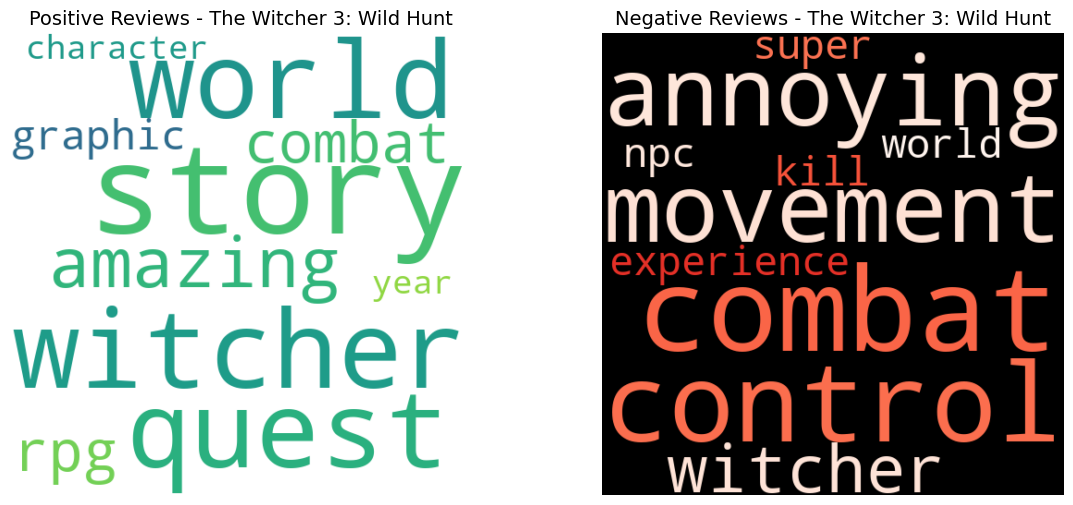

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Select a game for visualization
selected_game = "The Witcher 3: Wild Hunt"  # Change this to any game you want

# Extract positive and negative words for the selected game
game_data = df_top_words[df_top_words["Game"] == selected_game]

if not game_data.empty:
    pos_words = game_data["Top_Positive_Words"].values[0]
    neg_words = game_data["Top_Negative_Words"].values[0]

    # Convert lists to space-separated strings
    pos_text = " ".join(pos_words)
    neg_text = " ".join(neg_words)

    # Create figure for side-by-side word clouds
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Generate Positive Word Cloud
    wordcloud_pos = WordCloud(width=500, height=500, background_color="white").generate(pos_text)
    axes[0].imshow(wordcloud_pos, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title(f"Positive Reviews - {selected_game}", fontsize=14)

    # Generate Negative Word Cloud
    wordcloud_neg = WordCloud(width=500, height=500, background_color="black", colormap="Reds").generate(neg_text)
    axes[1].imshow(wordcloud_neg, interpolation="bilinear")
    axes[1].axis("off")
    axes[1].set_title(f"Negative Reviews - {selected_game}", fontsize=14)

    # Show the word clouds
    plt.show()
else:
    print(f"No data found for {selected_game}")
